In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
import copy

from graph import EGTGraph
import payoff_matrices
import adajcency_matrices
from gnn import GCN
from fitness import loss_ess, fit_strategy_node, fit_strategy_graph, get_nodes_strategy_fitness_df
from funs_examples import create_block_matrix_unit_column_sum
from utils import is_ess

In [2]:
# Define payoffs and adjacency matrix
payoff_mats = [payoff_matrices.define_hawk_dove_retailator_payoff(v=0.7,c=1.0)] * 6

payoff_mats = [payoff_matrices.define_hawk_dove_retailator_payoff(v=0.7,c=1.0),
               payoff_matrices.define_hawk_dove_retailator_payoff(v=0.5,c=1.0),
               payoff_matrices.define_hawk_dove_retailator_payoff(v=0.8,c=1.2),
               payoff_matrices.define_hawk_dove_retailator_payoff(v=0.9,c=0.9),
               payoff_matrices.define_hawk_dove_retailator_payoff(v=0.4,c=1.2),
               payoff_matrices.define_hawk_dove_retailator_payoff(v=0.5,c=0.2)]

payoff_mats = [payoff_matrices.define_evo_stable_set_payoff()]

#payoff_mats = [payoff_matrices.define_hawk_dove_payoff(v=0.7,c=1.0)]
num_nodes = len(payoff_mats)
adj_mat = adajcency_matrices.get_id_matrix(num_nodes=num_nodes)

#adj_mat = adajcency_matrices.A5
#adj_mat = create_block_matrix_unit_column_sum(num_nodes=6, num_blocks=2, prob_link=0.5, seed=7)
#payoff_mats = [payoff_matrices.define_hawk_dove_payoff(v=0.7,c=1.0), payoff_matrices.define_hawk_dove_payoff(v=1.2,c=1.0)]

In [3]:
# Create graph 
g0 = EGTGraph(payoff_matrices = payoff_mats,adjacency_matrix=adj_mat, seed_nodes_features=3)
g = copy.deepcopy(g0)

/Users/lrigolli/PycharmProjects/GNN/utils.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  x_tensor = torch.tensor(x_list, dtype=torch.float)


In [4]:
payoff_mats[0]

tensor([[0., 2., 0.],
        [2., 0., 0.],
        [1., 1., 0.]])

In [5]:
# q: do we miss some ESS by removing dominated strategies?

num nodes: 1
num strategies: 3
num edges: 1
adjacency matrix: tensor([[1.]])
payoff matrices: [tensor([[0., 2., 0.],
        [2., 0., 0.],
        [1., 1., 0.]])]
nodes features: tensor([[0.3554, 0.4569, 0.1877]])
nodes weights: tensor([1.])
dominated_strategies: []
match between non-dominated reduced strategies and original strategies: None


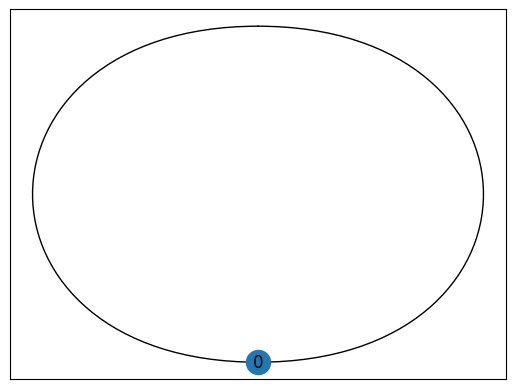

In [6]:
g0.describe_egtgraph()

In [7]:
# TODO: FIX Remove dominated strategies
#g.remove_dominated_strategies_iterative()

num nodes: 1
num strategies: 3
num edges: 1
adjacency matrix: tensor([[1.]])
payoff matrices: [tensor([[0., 2., 0.],
        [2., 0., 0.],
        [1., 1., 0.]])]
nodes features: tensor([[0.3554, 0.4569, 0.1877]])
nodes weights: tensor([1.])
dominated_strategies: []
match between non-dominated reduced strategies and original strategies: None


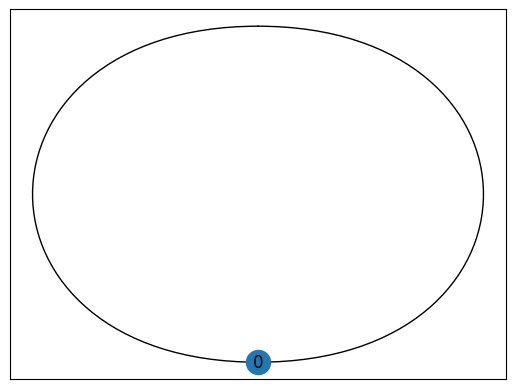

In [8]:
# Describe graph afteer removal of dominated strategies
g.describe_egtgraph()

In [9]:
# Define GNN model 
model = GCN(graph=g, payoff_matrices=g.payoff_matrices, hid1_in=10, hid2_in=10)

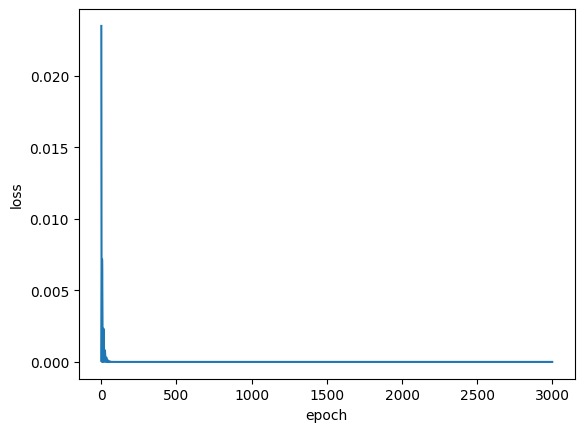

In [10]:
# Train model
num_epochs = 3000
pred = model.optimize(num_epochs=num_epochs)

In [11]:
#loss_ess(nodes_feats=X_dove.float() , graph=g, payoff_matrix=payoff_mat)
#loss_ess(output=X_dove.float(), adjacency_mat=A.float(), payoff_mat =P.float())
#loss_ess(nodes_feats=X_hawk.float() , graph=g, payoff_matrix=payoff_mat)
#loss_ess(nodes_feats=X_mix.float() , graph=g, payoff_matrix=payoff_mat)
#fit_strategy_node(strategy_idx=1, node_idx=0, graph = g, payoff_matrices=payoff_mats, nodes_feats=pred)

In [12]:
get_nodes_strategy_fitness_df(X=pred, graph=g, payoff_matrices=payoff_mats)

,0,1,2
0,0.623108,0.623108,0.623108


In [13]:
is_ess(pred[0].detach(), payoff_mats[0])

gradient: tensor([0., 0.])
Hessian: tensor([[ 2., -2.],
        [-2.,  2.]])
tensor([0.3116, 0.3116, 0.3769]) is a critical point


/Users/lrigolli/PycharmProjects/GNN/utils.py:68: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3641.)
  grad = torch.matmul(phi.T, (torch.matmul(p.T, F) - torch.matmul(F.T, p) - torch.matmul(F, p)).T)


False

In [ ]:
stop

In [16]:
# X_mix = torch.stack((torch.ones(num_nodes)*0.7,torch.ones(num_nodes)*0.3)).T

In [17]:
# rmk: if v>d for hawk-dove then best strategy is obtained for loss >0

In [18]:
# Move tensor to GPU if available
print(torch.cuda.is_available())
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

False


In [20]:
"""np.random.seed(7)
# Create payoff matrix to define loss function
A0 = np.zeros(shape=(num_nodes, num_nodes))
prob_link = 0.5
for i in range(num_nodes):
    A0[i,i:] = np.random.binomial(n=1, p=prob_link, size=num_nodes-i)    
A = A0 + A0.T
for i in range(num_nodes):
    A[i,i] = 0"""

'np.random.seed(7)\n# Create payoff matrix to define loss function\nA0 = np.zeros(shape=(num_nodes, num_nodes))\nprob_link = 0.5\nfor i in range(num_nodes):\n    A0[i,i:] = np.random.binomial(n=1, p=prob_link, size=num_nodes-i)    \nA = A0 + A0.T\nfor i in range(num_nodes):\n    A[i,i] = 0'

In [21]:
"""X_dove = torch.stack((torch.zeros(num_nodes),torch.ones(num_nodes))).T
X_hawk = torch.stack((torch.ones(num_nodes),torch.zeros(num_nodes))).T
X_mix = torch.stack((torch.ones(num_nodes)*0.8,torch.ones(num_nodes)*0.2)).T
X_rock = torch.stack((torch.ones(num_nodes),torch.zeros(num_nodes),torch.zeros(num_nodes))).T
X_scissors = torch.stack((torch.zeros(num_nodes),torch.ones(num_nodes),torch.zeros(num_nodes))).T
X_paper = torch.stack((torch.zeros(num_nodes),torch.zeros(num_nodes),torch.ones(num_nodes))).T

fit_strategy_node(strategy_idx=0, node_idx=0, graph = g, payoff_matrices=g.payoff_matrices, nodes_feats=X_rock)
fit_strategy_node(strategy_idx=0, node_idx=0, graph = g, payoff_matrices=g.payoff_matrices, nodes_feats=X_scissors)
fit_strategy_node(strategy_idx=0, node_idx=0, graph = g, payoff_matrices=g.payoff_matrices, nodes_feats=X_paper)"""

'X_dove = torch.stack((torch.zeros(num_nodes),torch.ones(num_nodes))).T\nX_hawk = torch.stack((torch.ones(num_nodes),torch.zeros(num_nodes))).T\nX_mix = torch.stack((torch.ones(num_nodes)*0.8,torch.ones(num_nodes)*0.2)).T\nX_rock = torch.stack((torch.ones(num_nodes),torch.zeros(num_nodes),torch.zeros(num_nodes))).T\nX_scissors = torch.stack((torch.zeros(num_nodes),torch.ones(num_nodes),torch.zeros(num_nodes))).T\nX_paper = torch.stack((torch.zeros(num_nodes),torch.zeros(num_nodes),torch.ones(num_nodes))).T\n\nfit_strategy_node(strategy_idx=0, node_idx=0, graph = g, payoff_matrices=g.payoff_matrices, nodes_feats=X_rock)\nfit_strategy_node(strategy_idx=0, node_idx=0, graph = g, payoff_matrices=g.payoff_matrices, nodes_feats=X_scissors)\nfit_strategy_node(strategy_idx=0, node_idx=0, graph = g, payoff_matrices=g.payoff_matrices, nodes_feats=X_paper)'